Un cilindro sólido de hierro fundido viene dado por las desigualdades $x^2+y^2\ge 1$, $1\ge z \ge 4$. La temperatura en el punto $(x,y,z)$ en una región que contiene el cilindro es $T(x,y,z)= (x^2+y^2)z$. Dada que la conducitividad términa del hierro fundidio es de $55$, encuentra el flujo de calor a través del límite del sólido si dicho límite está orientado hacia fuera.


Si $T(x,y,z)$ es la función temeperatura

El flujo de calor es un campo vectorial proporcional al gradiente de la temperatura negativa: $F= -k \nabla T$, donde $k$ es la constante de conductividad términa de la sustancia a partir de la cual está hecho el objeto.

La tasa de flujo de calor a través de la superficie $S$ es

$$
\int \int_S F\cdot dS= \int \int_S -k \nabla T \cdot dS= \int \int_S -k \nabla T \cdot n \,dS 
$$

$n$: normal exterior unitario.



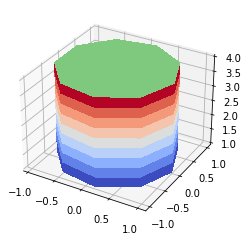

In [1]:
import numpy as np
m=10
th=np.linspace(0, 2*np.pi,m)
z=np.linspace(1,4,m)
Th,Z=np.meshgrid(th,z)
X=np.cos(Th);Y=np.sin(Th)


import matplotlib.pyplot as plt
from matplotlib import cm

fig1, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,linewidth=0, antialiased=False)

th=np.linspace(0, 2*np.pi,m)
r=np.linspace(0,1,m)
Th,R=np.meshgrid(th,r)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=np.ones_like(Th)

surf = ax.plot_surface(X, Y, Z, cmap=cm.YlGnBu,linewidth=0, antialiased=False)

surf = ax.plot_surface(X, Y, 4*Z, cmap=cm.Accent,linewidth=0, antialiased=False)

plt.show()

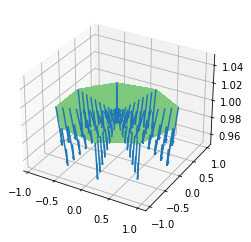

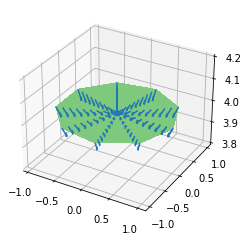

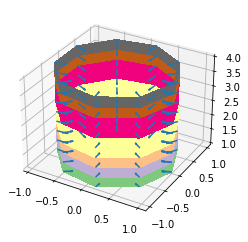

In [2]:
import sympy as sp
x,y,z=sp.symbols('x,y,z')
T=(x**2+y**2)*z
Tx=-sp.diff(T,x);Ty=-sp.diff(T,y);Tz=-sp.diff(T,z)
k=55
Fx=sp.lambdify([x,y,z],Tx);Fy=sp.lambdify([x,y,z],Ty);Fz=sp.lambdify([x,y,z],Tz)


#Tapa inferior : S1
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})
th=np.linspace(0, 2*np.pi,m)
r=np.linspace(0,1,m)
Th,R=np.meshgrid(th,r)
X=R*np.cos(Th);Y=R*np.sin(Th)
Z=np.ones_like(Th)

surf = ax.plot_surface(X, Y, Z, cmap=cm.Accent,linewidth=0, antialiased=False)
ax.quiver(X, Y, Z, Fx(X,Y,Z), Fy(X,Y,Z),Fz(X,Y,Z), length=0.1, normalize=True,cmap=cm.Purples)


plt.show()

#Tapa superior : S2
fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, 4*Z, cmap=cm.Accent,linewidth=0, antialiased=False)
ax.quiver(X, Y, 4*Z, Fx(X,Y,Z), Fy(X,Y,Z),Fz(X,Y,Z), length=0.1, normalize=True,cmap=cm.Purples)


plt.show()

# Cilindro: S3
th=np.linspace(0, 2*np.pi,m)
z=np.linspace(1,4,m)
Th,Z=np.meshgrid(th,z)
X=np.cos(Th);Y=np.sin(Th)

fig2, ax = plt.subplots(subplot_kw={"projection": "3d"})

surf = ax.plot_surface(X, Y, Z, cmap=cm.Accent,linewidth=0, antialiased=False)
ax.quiver(X, Y, Z, Fx(X,Y,Z), Fy(X,Y,Z),Fz(X,Y,Z), length=0.2, normalize=True,cmap=cm.Purples)


plt.show()





In [20]:
#Cálculos de las tres integrales

"""
import sympy.vector as vector
R=vector.CoordSys3D('R')
T=(R.x**2+R.y**2)*R.z
gradT=vector.gradient(T)
print(gradT)
F=-gradT
print(F)
"""

x,y,z=sp.symbols('x,y,z')
T=(x**2+y**2)*z
Tx=-sp.diff(T,x);Ty=-sp.diff(T,y);Tz=-sp.diff(T,z)
gradT=sp.Matrix([Tx,Ty,Tz])
gradT_xyz=gradT
u,v=sp.symbols('u,v')
#S1 (tapa inferior)
r=sp.Matrix( [ u*sp.cos(v), u*sp.sin(v), 1 ] )
ru=sp.diff(r,u)
rv=sp.diff(r,v)
print(ru)
print(rv)
n=ru.cross(rv)
print(n)
n=sp.simplify(n)
n=-n #cambio el normal, para coger el normal correcto
gradT=gradT.subs([ (x,r[0]),(y,r[1]),(z,r[2])    ]) 
F=-k*gradT.dot(n)
print("F= ",F)
F=sp.simplify(F)
print(F)


flujoS1=sp.integrate(F,(u,0,1),(v,0,2*sp.pi))
print("flujoS1= ", flujoS1)


#S2 (tapa superior)

r=sp.Matrix( [ u*sp.cos(v), u*sp.sin(v), 4 ] )
ru=sp.diff(r,u)
rv=sp.diff(r,v)
#print(ru)
#print(rv)
n=ru.cross(rv)
n=sp.simplify(n)
gradT=gradT.subs([ (x,r[0]),(y,r[1]),(z,r[2])    ]) 
F=-k*gradT.dot(n)
#print("F= ",F)
F=sp.simplify(F)
print(F)


flujoS2=sp.integrate(F,(u,0,1),(v,0,2*sp.pi))
print("flujoS2= ", flujoS2)

#S3 (cilindro)

r=sp.Matrix( [ sp.cos(v), sp.sin(v), u ] )
ru=sp.diff(r,u)
rv=sp.diff(r,v)
#print(ru)
#print(rv)
n=ru.cross(rv)
#print(n)
n=sp.simplify(n) 
gradT=gradT.subs([ (x,r[0]),(y,r[1]),(z,r[2])    ]) 
F=-k*gradT.dot(n)
#print("F= ",F)
F=sp.simplify(F)
#print(F)


flujoS3=sp.integrate(F,(u,1,4),(v,0,2*sp.pi))
print("flujoS3= ", flujoS3)

flujoS=flujoS1+flujoS2+flujoS3
print(flujoS)

Matrix([[cos(v)], [sin(v)], [0]])
Matrix([[-u*sin(v)], [u*cos(v)], [0]])
Matrix([[0], [0], [u*sin(v)**2 + u*cos(v)**2]])
F=  55*u*(-u**2*sin(v)**2 - u**2*cos(v)**2)
-55*u**3
flujoS1=  -55*pi/2
55*u**3
flujoS2=  55*pi/2
flujoS3=  -1650*pi
-1650*pi


In [17]:
#Haciendo el mismo ejericico aplicando el teorema de la divergencia


F=gradT_xyz
print(F)
divF=sp.diff(F[0],x)+sp.diff(F[1],y)+sp.diff(F[2],z)


print("divF=", divF)
print(F)
r,th=sp.symbols('r,th')
divF=divF.subs([ (x,r*sp.cos(th)),(y,r*sp.sin(th)) ])
print(divF)
flujo=55*sp.integrate(divF*r,(th,0,2*sp.pi),(r,0,1),(z,1,4))
print(flujo)

Matrix([[-2*x*z], [-2*y*z], [-x**2 - y**2]])
divF= -4*z
Matrix([[-2*x*z], [-2*y*z], [-x**2 - y**2]])
-4*z
-1650*pi
